# Machine Learning Engineer Nanodegree - Capstone Project

## Project: ML model to accurately predict whether or not the patients in the dataset have diabetes

### Project Overview 

Diabetes is a major chronic disease that affects more than 30 million people in the United States. The American Diabetes Association released new research on March 22, 2018 estimating the total costs of diagnosed diabetes have risen to \$327 billion in 2017 from \$245 billion in 2012, when the cost was last examined.

It occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.


### Problem Statement

The goal of this project is to build a machine learning model to predict the onset of diabetes based on some diagnostic measures. The expected outcome of this project is to contribute to the clinical research study related to diabetes.

MAIN OBJECTIVE: Build a mathematical model to predict whether or not a patient has diabetes, based on certain diagnostic measurements.

SECONDARY OBJECTIVE: Identify important features or a set of clusters of features that are highly related to diabetes.

The data includes a binary prediction variable(label) outcome. In this task, it is required to build a function that will map the set of input features with the binary outcome(true/false). I would consider this as a supervised 'binary classification' task.

### Datasets and Inputs

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database 

PN : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

|Feature Name| Description |Datetype |
|:-------------|:-------------|:-----|
|Pregnancies | Number of times pregnant |Numeric|
|Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|Numeric|
|BloodPressure|Diastolic blood pressure (mm Hg)|Numeric|
|SkinThickness|Triceps skin fold thickness (mm)|Numeric|
|Insulin|2-Hour serum insulin (mu U/ml)|Numeric|
|BMI|Body mass index (weight in kg/(height in m)^2)|Numeric|
|DiabetesPedigreeFunction|Diabetes pedigree function|Numeric|
|Age|Age (years)|Numeric|
|**Outcome**|Class variable (0 or 1)|Numeric|

## 1. Environment and Libraries setp

In [343]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

## 2. Analysis

### 2a. Data Exploration

In [344]:
# Load the Diabetes dataset
data = pd.read_csv("diabetes.csv")

# Summary of the records
print ("This dataset has {} samples with {} features each.".format(data.shape[0], data.shape[1]))
#print('We are the {} who say "{}!"'.format('knights', 'Ni'))

# Display the first 10 record
print ("\nDisplay the first 10 record")
display(data.head(n=10))

# Describe the data
print ("Statistical description of dataset\n--------------------------------------")
display(data.describe())

print ('Note\n-----')
print ('All values are numerical')
print ("'Outcome' is the target/label variable that can have only binary value(0/1)\n\n")
data.info()

This dataset has 768 samples with 9 features each.

Display the first 10 record


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Statistical description of dataset
--------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note
-----
All values are numerical
'Outcome' is the target/label variable that can have only binary value(0/1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Total number of individuals: 768
Individuals with diabetes: 268
Individuals without diabetes: 500
Percentage of individuals with diabetes: 34.90%



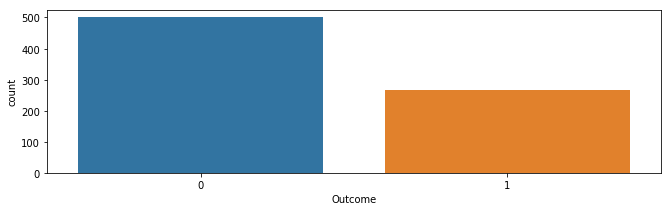

In [345]:
# Evaluate the balance(number of instances per lebel) of the data set 
n_records = data.shape[0]
n_with_diabetes = data[data["Outcome"]==1].shape[0]
n_without_diabetes = data[data["Outcome"]==0].shape[0]
greater_percent = (n_with_diabetes*100)/float(n_records)

print ("\nTotal number of individuals: {}".format(n_records))
print ("Individuals with diabetes: {}".format(n_with_diabetes))
print ("Individuals without diabetes: {}".format(n_without_diabetes))
print ("Percentage of individuals with diabetes: {:.2f}%\n".format(greater_percent))

# Count of instances per Target/Label variable Viz
sns.countplot(data['Outcome'],label="Count")

Note - 
Since 500 out of 768 individuals don't have diabetes, so it would considered as an unbalanced dataset.

### 2b. Exploratory Visualization

#### 2b-1. Check number of 0 or missing values

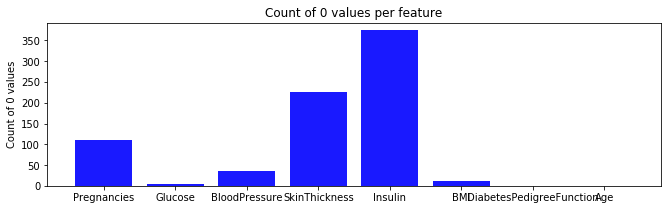

In [346]:
# Missing Or Unwanted 0 values 
featurelist = []
count_of_zero_list = []

for col in data:
    cnt = 0
    for i in data[col]:
        if i==0:
            cnt = cnt + 1
    if col!='Outcome':
        #print (col, "-", cnt)
        featurelist.append(col)
        count_of_zero_list.append(cnt)
        
objects = tuple(featurelist)
y_pos = np.arange(len(featurelist))
performance = count_of_zero_list
 
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 11
fig_size[1] = 3

plt.bar(y_pos, performance, align='center', color='b', alpha=0.9)
plt.xticks(y_pos, objects)

plt.ylabel('Count of 0 values')
plt.title('Count of 0 values per feature')
 
plt.show()

<b><font color="blue"> Observation </font></b>

Features like 'SkinThickness', 'Insulin' have a significant number of 0 values. 

#### 2b-2. Feature distribution viz using histogram and boxplots

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

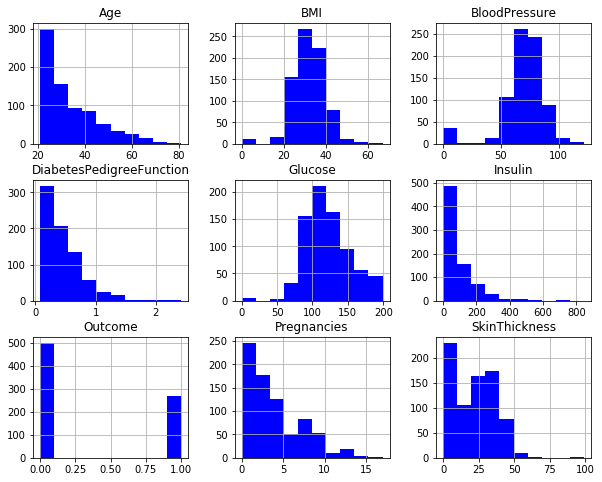

In [347]:
data.hist(figsize=(10,8),color='b')
pd.DataFrame.skew(data, axis=0)

#### <font color="blue">Observation</font>

1. Most attributes like Age, DiabetesPedigree Function, Insuiln are highly skewed towords left.
2. Significant number of missing or zero values for features like 'Insulin' and 'SkinThickness' have significant effect on their distribution. While building the model, these should be imputed properly. 

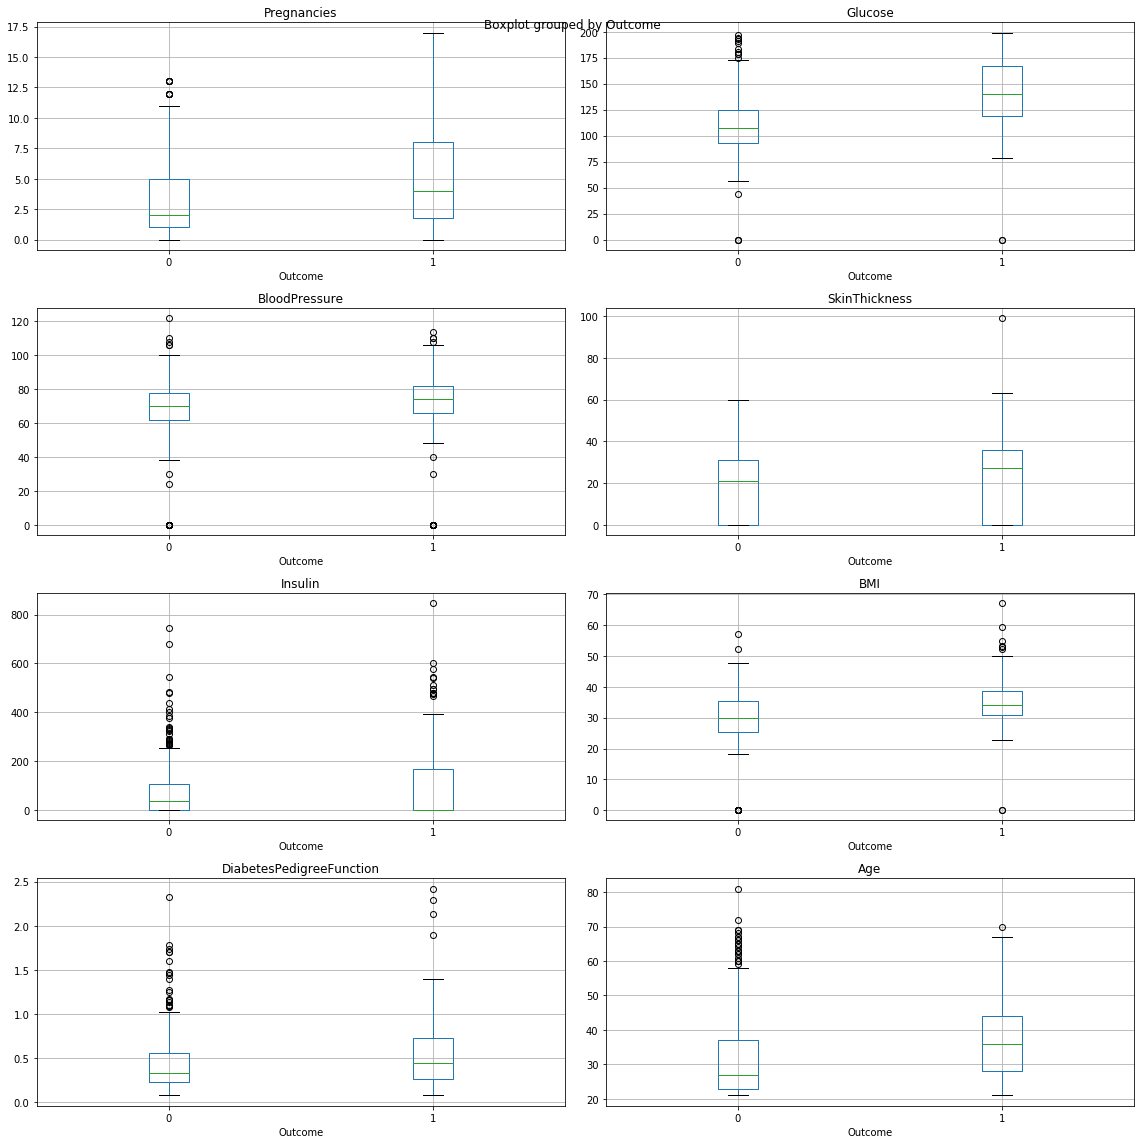

In [348]:
# Comparing distributions, the centre, spread and overall range  w.r.t two binary outcome(0/1) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

data.boxplot(column='Pregnancies', by='Outcome',ax=axes[0,0])
data.boxplot(column='Glucose', by='Outcome', ax=axes[0,1])
data.boxplot(column='BloodPressure', by='Outcome',ax=axes[1,0])
data.boxplot(column='SkinThickness', by='Outcome', ax=axes[1,1])
data.boxplot(column='Insulin', by='Outcome',ax=axes[2,0])
data.boxplot(column='BMI', by='Outcome', ax=axes[2,1])
data.boxplot(column='DiabetesPedigreeFunction', by='Outcome',ax=axes[3,0])
data.boxplot(column='Age', by='Outcome', ax=axes[3,1])

fig.tight_layout()

#### <font color="blue">Observation</font>

|Feature comparision with Outcome(0/1)| Comments(w.r.t median and outlier) |
|:-------------------------------------|:-------- |
|Pregnancies                 |Patients with higher number of pregnancies are prone to diabetes|
|Glucose                     |High Glucose amount increases the chance of diabetes|
|BloodPressure               |NA|
|SkinThickness               |Higher value of 'Triceps skin fold thickness (mm)' gives an indication of diabetes|
|Insulin                     |There are too many missing or zero values. We need to impute the missing values|
|BMI                         |Higher BMI value increases the chance of diabetes|
|DiabetesPedigreeFunction    |Patients with high DiabetesPedigreeFunction are prone to diabetes|
|Age                         |Median age of diabetes patients is ~8 yrs more than same of non-diabetic patients|


#### 2b-3. Features correlations

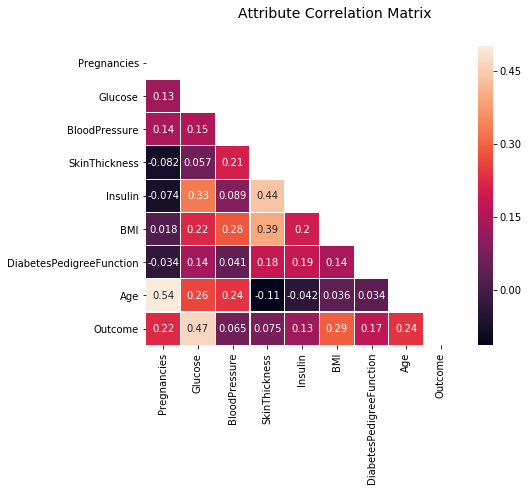

In [349]:
# calculate correlation
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5,linewidths=0.1)
fig.suptitle('Attribute Correlation Matrix', fontsize=14)

#### <font color="blue">Observation</font>

Following pairs have a high correlation score. 

1. Age and Pregnancies (0.54)
2. Outcome and Glucose  (0.47)
3. Insulin and SkinThickness (0.44) 
4. BMI and SkinThickness (0.39)

<b>Reference - [Plotting a diagonal correlation matrix](Plotting a diagonal correlation matrix)</b>

## 3. Methodology

- ### 3a. Data Preprocessing
- ### 3b. Evaluation Metrics 
- ### 3c. Define Train/Test Dataset
- ### 3d. Define Benchmark
- ### 3e. Implementation 
    - #### 3e-1. Creating a Training and Predicting Pipeline
    - #### 3e-2. Model comparision and selection
    - #### 3e-3. Feature selection and model tuning
- ### 3f. Comparision with Benchmark

In [350]:
# Split the data into features and target label
outcome = data['Outcome']
features = data.drop('Outcome', axis = 1)
features_backup = data.drop('Outcome', axis = 1)

### 3a. Data Preprocessing

Objective - Before using this data as input for ML algo, it needs to be cleaned, formatted, and restructured. This preprocessing should help with the outcome(diabetes/non-diabetes) and predictive power of the model.

* <b>3a-1. Data Cleaning ( Impute missing values )</b>
* <b>3a-2. Transform numeric values in log scale ( minimize the effect of outliers )</b>
* <b>3a-3. Scale numeric values ( 0 to 1 scale )</b>


#### 3a-1. Data Cleaning

Replace 0 values with the corresponding column mean. Since it might have some bad effect on the model, we might need to revert this operation for a subset of the columns while refining the model.

Following 3 are the top 3 features w.r.t number of 0 values. 
- SkinThickness, 
- Insulin
- Pregnencies
- BMI

Other than the 'pregnencies', almost none of them should contain 0 values. Here, 0 values are replaced with the correponding column mean. 

In [351]:
display(features.head(n=5))
features[['SkinThickness', 'Insulin', 'BMI']] = features[['SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
display(features.head(n=5))
features.fillna(features.mean(), inplace=True)
display(features.head(n=5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,NaN,33.6,0.627,50
1,1,85,66,29.0,NaN,26.6,0.351,31
2,8,183,64,NaN,NaN,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.00000,155.548223,33.6,0.627,50
1,1,85,66,29.00000,155.548223,26.6,0.351,31
2,8,183,64,29.15342,155.548223,23.3,0.672,32
3,1,89,66,23.00000,94.000000,28.1,0.167,21
4,0,137,40,35.00000,168.000000,43.1,2.288,33


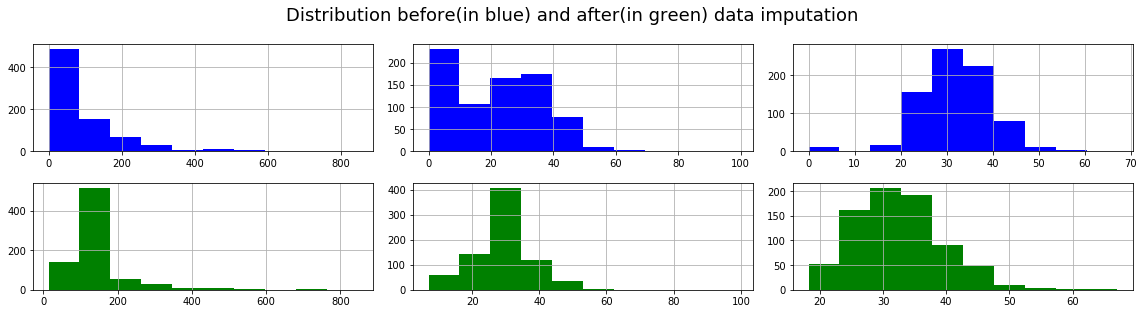

In [352]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,4))
fig.suptitle('Distribution before(in blue) and after(in green) data imputation', fontsize=18, y=1.08)

for i, feature in enumerate(['Insulin', 'SkinThickness', 'BMI']):
    data[feature].hist(color='b',ax=axes[0,i])
    features[feature].hist(color='g',ax=axes[1,i])

fig.tight_layout()

#### 3a-2. Data transformation 
Fields like 'Age', 'Pregnancies', 'DiabetesPedigreeFunction' are highly skewed towords left. 
To minimize the effect of any very large and very small values, log transformations is performed. 

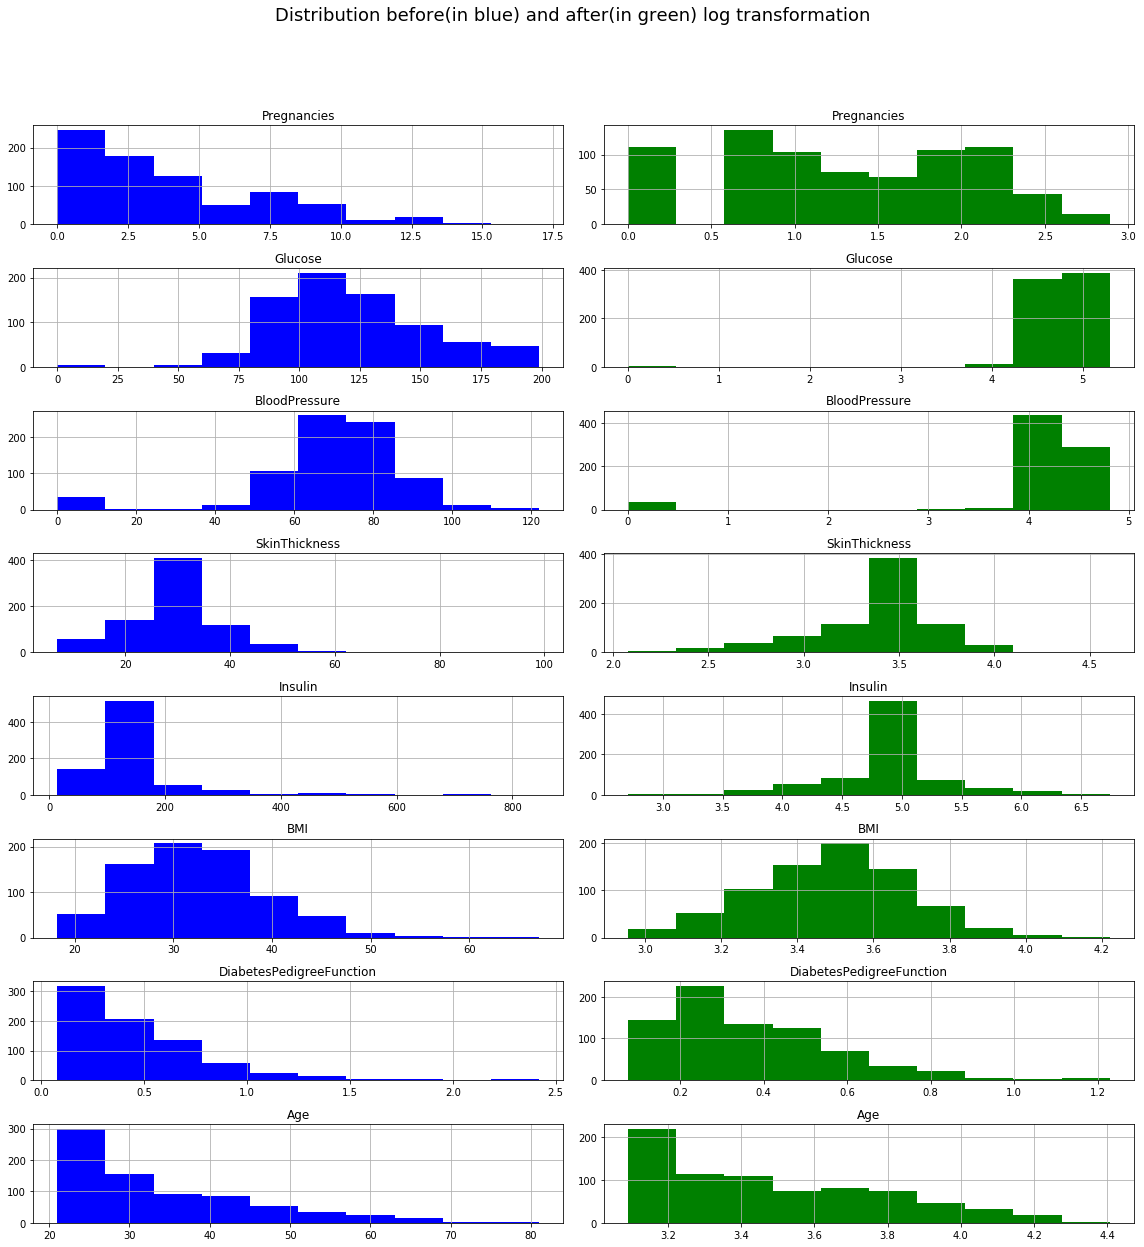

In [353]:
# TODO: Scale the data using the natural logarithm
features_log_transformed = features.apply(lambda x: np.log(x+1))

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16,16))

for i, feature in enumerate(features):
    features[[feature]].hist(color='b',ax=axes[i,0])
    features_log_transformed[[feature]].hist(color='g',ax=axes[i,1])

fig.suptitle('Distribution before(in blue) and after(in green) log transformation', fontsize=18, y=1.08)

fig.tight_layout()

features_log_transformed.to_csv("features_log_transformed.csv")

#### <font color="blue">Observation</font>

The distributions of 'Glucose' and 'BloodPressure' suggest that there a few outliers that contain 0 values. 
Since the dataset size is relatively small, it might not be a good idea to remove these outliers. 

#### 3a-3. Scale numeric values ( 0 to 1 scale ) 

Data normalization ensures that each feature is treated equally when applying supervised learners. 

In [354]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

features_log_minmax_transformed = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transformed.head(n = 5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673239,0.944441,0.891583,0.595502,0.581437,0.465176,0.356534,0.639050
1,0.239812,0.840710,0.873760,0.523317,0.581437,0.286640,0.195523,0.284791
2,0.760188,0.984263,0.867462,0.525336,0.581437,0.186061,0.380165,0.308180
3,0.239812,0.849290,0.873760,0.434968,0.457607,0.328441,0.068711,0.000000
4,0.000000,0.929966,0.771702,0.595502,0.600411,0.656797,0.965907,0.330870


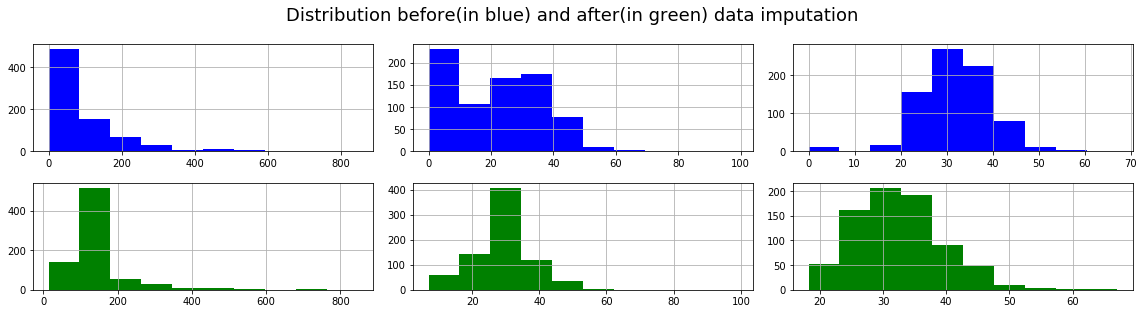

In [355]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,4))
fig.suptitle('Distribution before(in blue) and after(in green) data imputation', fontsize=18, y=1.08)

for i, feature in enumerate(['Insulin', 'SkinThickness', 'BMI']):
    data[feature].hist(color='b',ax=axes[0,i])
    features[feature].hist(color='g',ax=axes[1,i])

fig.tight_layout()

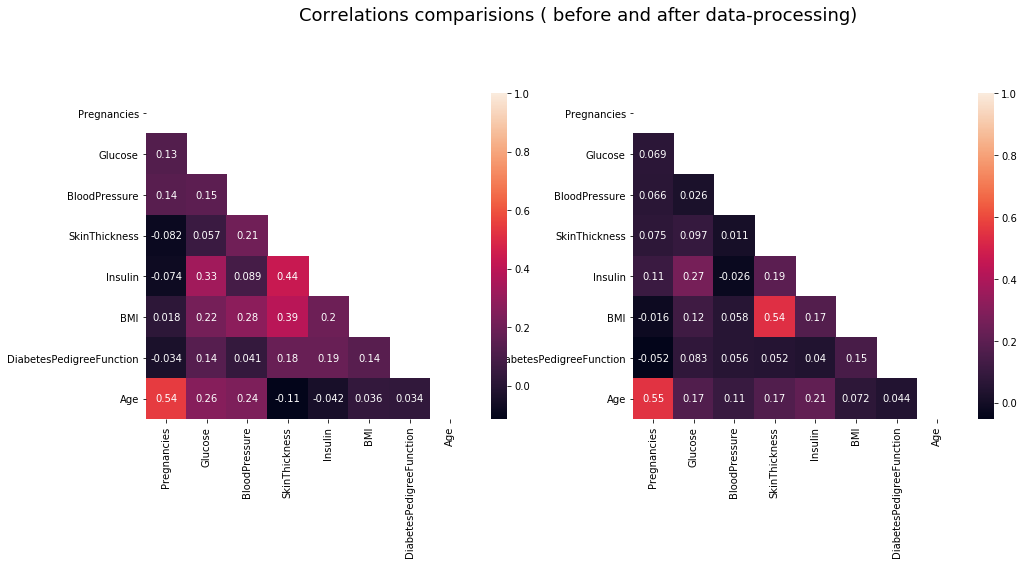

In [356]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Correlations comparisions ( before and after data-processing)', fontsize=18, y=1.08)

mask = np.zeros_like(features_backup.corr(), dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features_backup.corr(), mask=mask, annot=True,ax=axes[0])

mask = np.zeros_like(features_log_minmax_transformed.corr(), dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features_log_minmax_transformed.corr(), mask=mask, annot=True,ax=axes[1])

#### <font color="blue">Observation</font>

### 3b. Evaluation Metrics 

While evaluating the performance of the benchmark models and best solution model, I will consider the 'model accuracy' using train/test split or K-fold cross-validation. The input dataset is bit unbalanced(~35%:65%) w.r.t the prediction variable 'outcome', so I will leverage the 'recall' factor and use 'confusion matrix' to measure different types of prediction. Since this model will be used to disease diagnosis, we will try to minimize the 'false negative' type error (i.e A result that appears negative when it should not).

In this case, we would use F2 Score since it favors 'recall' over 'precision'.

Related formula

Fβ score = (1+β2) * (precision⋅recall / (β2⋅precision)+recall)

In this cases, β = 2.
Precision = [True Positives/(True Positives + False Positives)]

Recall = [True Positives/(True Positives + False Negatives)]

### 3c. Define train/test dataset
Data is splitted in 8:2 proportion to created training and testing set

In [357]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transformed, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


### 3d. Benchmark 

#### <font color='b'>Benchmark-1 : Naive Model</font>
Since 500 out of 768 individuals don't have diabetes, so we would consider this an unbalanced dataset. 
- <b> A naive benchmark model for this problem would be to predict that none of the patients have diabetes. </b>

Number of diabetic vs non-diabetic patients in the test dataset
0    107
1     47
Name: Outcome, dtype: int64

Naive Model KPI
-----------------
-> naive_recall_score : 1.0
-> naive_accuracy_score : 0.31
-> naive_f2_score : 0.69
<class 'numpy.ndarray'>

TN = 0, FP = 107, FN = 0, TP = 47


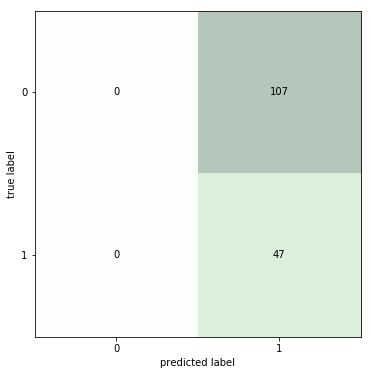

In [358]:
from sklearn.metrics import recall_score, accuracy_score,  fbeta_score

# Count of instances per Target/Label variable Viz
# sns.countplot(y_test.values,label="Count")
print("Number of diabetic vs non-diabetic patients in the test dataset")
print(y_test.value_counts())
predictions_test = [1] * 154

results = {}
print("\nNaive Model KPI\n-----------------")
results['naive_accuracy_score'] = accuracy_score(y_test.values, predictions_test)
results['naive_recall_score'] = recall_score(y_test.values, predictions_test)    
results['naive_f2_score'] = fbeta_score(y_test.values, predictions_test, beta=2)

for key, value in results.items():
    print("-> {} : {}".format(key, round(value,2)))
    
from sklearn.metrics import confusion_matrix
print (type(y_test.values))
cm = confusion_matrix(y_test.values, predictions_test)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

Recall = [tp/(tp + fn)]

# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

#### <font color='b'>Benchmark-2 : Naive Model</font>
According to several legitimate sources, Type-2 diabetes is correlated with obesity and/or BMI. Following article suggests that Overweight was defined as having a body mass index between 25 and 29.9. http://www.diabetesincontrol.com/body-mass-index-and-type-2-diabetes-risk/

- <b> I'll consider the average(27.5) of the above BMI range(25 to 29.9) as a threshold of this domain knowledge-based model. If a patient's BMI is above 27.5 then this model will diagnosis 'diabetes'. </b>

0    107
1     47
Name: Outcome, dtype: int64

 Naive Model KPI
-----------------
-> naive_recall_score : 1.0
-> naive_accuracy_score : 0.31
-> naive_f2_score : 0.69
<class 'numpy.ndarray'>

TN = 0, FP = 107, FN = 0, TP = 47


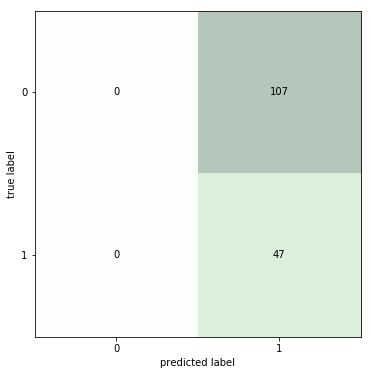

In [359]:
from sklearn.metrics import recall_score, accuracy_score,  fbeta_score

# Count of instances per Target/Label variable Viz
# sns.countplot(y_test.values,label="Count")
print(y_test.value_counts())
predictions_test = [1] * 154

results = {}
print("\n Naive Model KPI\n-----------------")
results['naive_accuracy_score'] = accuracy_score(y_test.values, predictions_test)
results['naive_recall_score'] = recall_score(y_test.values, predictions_test)    
results['naive_f2_score'] = fbeta_score(y_test.values, predictions_test, beta=2)

for key, value in results.items():
    print("-> {} : {}".format(key, round(value,2)))
    
from sklearn.metrics import confusion_matrix
print (type(y_test.values))
cm = confusion_matrix(y_test.values, predictions_test)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

Recall = [tp/(tp + fn)]

# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

#### <font color='b'>Benchmark-2 : Domain Knowledge-based Model</font>

According to the Wikipedia "They have the highest prevalence of type 2 diabetes in the world, much more than is observed in other U.S. populations".

Type 2 diabetes (formerly called non-insulin-dependent, or adult-onset) results from the body’s ineffective use of insulin. Type 2 diabetes comprises the majority of people with diabetes around the world, and is largely the result of excess body weight and physical inactivity.

According to several legitimate sources, Type-2 diabetes is correlated with obesity and/or BMI. Following article suggests that Overweight was defined as having a body mass index between 25 and 29.9. http://www.diabetesincontrol.com/body-mass-index-and-type-2-diabetes-risk/

We'll consider the average(27.5) of the above BMI range(25 to 29.9) as a threshold of this domain knowledge-based model. If a patient's BMI is above 27.5 then this model will diagnosis 'diabetes'.

[ 0.          0.          0.          2.07944154  2.7080502   2.95491028
  0.07510747  3.09104245]
5 2.95491027903 4.22097721316
3.33220451018
0.298004964013
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]

Naive Model KPI
-----------------
-> naive_recall_score : 0.89
-> naive_accuracy_score : 0.51
-> naive_f2_score : 0.7
<class 'numpy.ndarray'>

TN = 37, FP = 70, FN = 5, TP = 42


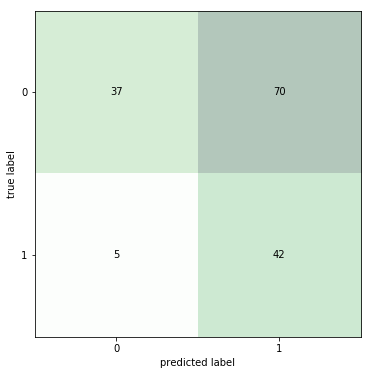

In [380]:
#y = features.apply(lambda x: np.log(x+1))
#X = features['BMI'].apply(lambda x: np.log(x+1))

#print(features_log_minmax_transformed['BMI'])
#inversed = scaler.inverse_transform(normalized)
#y = scaler.inverse_transform(features_log_minmax_transformed['BMI'])
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
print(scaler.data_min_)

gmi_log_min = 0
gmi_log_max = 0

for ind, feature in enumerate(features_log_minmax_transformed):
    if feature=='BMI':
        print(ind, scaler.data_min_[ind], scaler.data_max_[ind])
        gmi_log_min = scaler.data_min_[ind] 
        gmi_log_max = scaler.data_max_[ind]
        
log_of_27_5 = np.log(28)
print(log_of_27_5)

scaled_value_log_of_27_5 = (log_of_27_5 - gmi_log_min)/(gmi_log_max - gmi_log_min)
print(scaled_value_log_of_27_5)

#print(X_test['BMI'] > scaled_value_log_of_27_5)
#Y_pred = map(lambda x : 1 if x>scaled_value_log_of_27_5 else 0, X_test['BMI'])

predictions_test = [1 if x>scaled_value_log_of_27_5 else 0  for x in X_test['BMI']]
print(predictions_test)

# evaluation
results = {}
print("\nNaive Model KPI\n-----------------")
results['naive_accuracy_score'] = accuracy_score(y_test.values, predictions_test)
results['naive_recall_score'] = recall_score(y_test.values, predictions_test)    
results['naive_f2_score'] = fbeta_score(y_test.values, predictions_test, beta=2)

for key, value in results.items():
    print("-> {} : {}".format(key, round(value,2)))
    
from sklearn.metrics import confusion_matrix
print (type(y_test.values))
cm = confusion_matrix(y_test.values, predictions_test)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

Recall = [tp/(tp + fn)]

# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

### 3e. Implementation 

The following are some of the supervised learning models that are currently available in scikit-learn that you may choose from:

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

In [490]:
# 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Ensemble Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#DL
from sklearn.neural_network import MLPClassifier

classifiers = []

classifiers.append(('GNB', GaussianNB()))
classifiers.append(('DT', DecisionTreeClassifier(random_state=19)))
classifiers.append(('KNN', KNeighborsClassifier(5)))
classifiers.append(('SVC', SVC(random_state=19)))
classifiers.append(('LR', LogisticRegression(random_state=19)))
classifiers.append(('RF', RandomForestClassifier(random_state=19)))
classifiers.append(('GB', GradientBoostingClassifier(random_state=19)))
classifiers.append(('ADB', AdaBoostClassifier(random_state=19)))
classifiers.append(('MLP', MLPClassifier(random_state=19)))

#### 3e-1. Creating a Training and Predicting Pipeline

In [ ]:
def train_predict_pipeline(classifier, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - classifier: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}
    
    print ('sample_size - ', sample_size)
    
    # Fit the classifier to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    classifier.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = classifier.predict(X_test)
    predictions_train = classifier.predict(X_train[0:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(classifier.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [495]:
names = []
accuracy_scores = []
recall_scores = []
f2_scores = []
decision_types = []

for name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred) )
    
    cm = confusion_matrix(y_test.values, y_pred)
    tn, fp, fn, tp =  cm.ravel()
    
    decision_type = "TN={}, FP={}, FN={}, TP={}".format(tn, fp, fn, tp)
    
    decision_types.append(decision_type)
    
    f2_scores.append(round(fbeta_score(y_test, y_pred, beta=2),2))
    try:
        print(name, model.feature_importances_)
    except (RuntimeError, AttributeError):
        print(name, "feature importance is not applicable")
    names.append(name)
    
# Adding Benchmark scores for doing a comparitive analysis

names.append("Benchmark-1")
accuracy_scores.append(0.31)
recall_scores.append(1)
f2_scores.append(0.69)
decision_types.append("TN=0, FP=107, FN=0, TP=47")

names.append("Benchmark-2")
accuracy_scores.append(0.5)
recall_scores.append(0.89)
f2_scores.append(0.7)    
decision_types.append("TN=37, FP=70, FN=5, TP=42")
   
print("Name", len(names))    
print("decision_types", len(decision_types))

tr_split = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 
                         'Recall': recall_scores, 'F2-Score': f2_scores, 'DecisionTypes' : decision_types})
display(tr_split[['Name', 'F2-Score','Recall','Accuracy Score', 'DecisionTypes']].sort_values(['F2-Score', 'Recall'], ascending=[False, False]))

tr_split.to_csv('score_comparision.csv')


GNB feature importance is not applicable
DT [ 0.07660321  0.27922096  0.0895623   0.06530639  0.06026256  0.25323812
  0.070255    0.10555148]
KNN feature importance is not applicable
SVC feature importance is not applicable
LR feature importance is not applicable
RF [ 0.06619894  0.27057402  0.0803229   0.0768153   0.07393318  0.15468534
  0.11712331  0.160347  ]
GB [ 0.09082139  0.19466275  0.06881495  0.04664946  0.08777744  0.1775685
  0.19194241  0.1417631 ]
ADB [ 0.06  0.22  0.1   0.08  0.06  0.22  0.16  0.1 ]
MLP feature importance is not applicable
Name 11
decision_types 11


,Name,F2-Score,Recall,Accuracy Score,DecisionTypes
10,Benchmark-2,0.70,0.890000,0.500000,"TN=37, FP=70, FN=5, TP=42"
9,Benchmark-1,0.69,1.000000,0.310000,"TN=0, FP=107, FN=0, TP=47"
6,GB,0.69,0.680851,0.824675,"TN=95, FP=12, FN=15, TP=32"
5,RF,0.68,0.680851,0.811688,"TN=93, FP=14, FN=15, TP=32"
7,ADB,0.68,0.680851,0.792208,"TN=90, FP=17, FN=15, TP=32"
0,GNB,0.64,0.638298,0.779221,"TN=90, FP=17, FN=17, TP=30"
1,DT,0.61,0.617021,0.746753,"TN=86, FP=21, FN=18, TP=29"
2,KNN,0.58,0.574468,0.759740,"TN=90, FP=17, FN=20, TP=27"
4,LR,0.40,0.361702,0.766234,"TN=101, FP=6, FN=30, TP=17"
3,SVC,0.27,0.234043,0.740260,"TN=103, FP=4, FN=36, TP=11"


In [ ]:
# plot learning curve
index = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

plt.plot(index, train_results, 'o-', color='blue', label='Training Score')
plt.plot(index, test_results, 'o-', color='red', label='Test Score')
plt.xlim([-0.05, 1.05])
plt.ylim([0.60, 1.05])
plt.xlabel('Training Size')
plt.ylabel('F2 Score')
plt.legend(bbox_to_anchor=(1, 0.5), loc='right')
plt.title('Learning Curve \n(Optimized Random Forest Classifier)', fontsize=14, y=1.02)


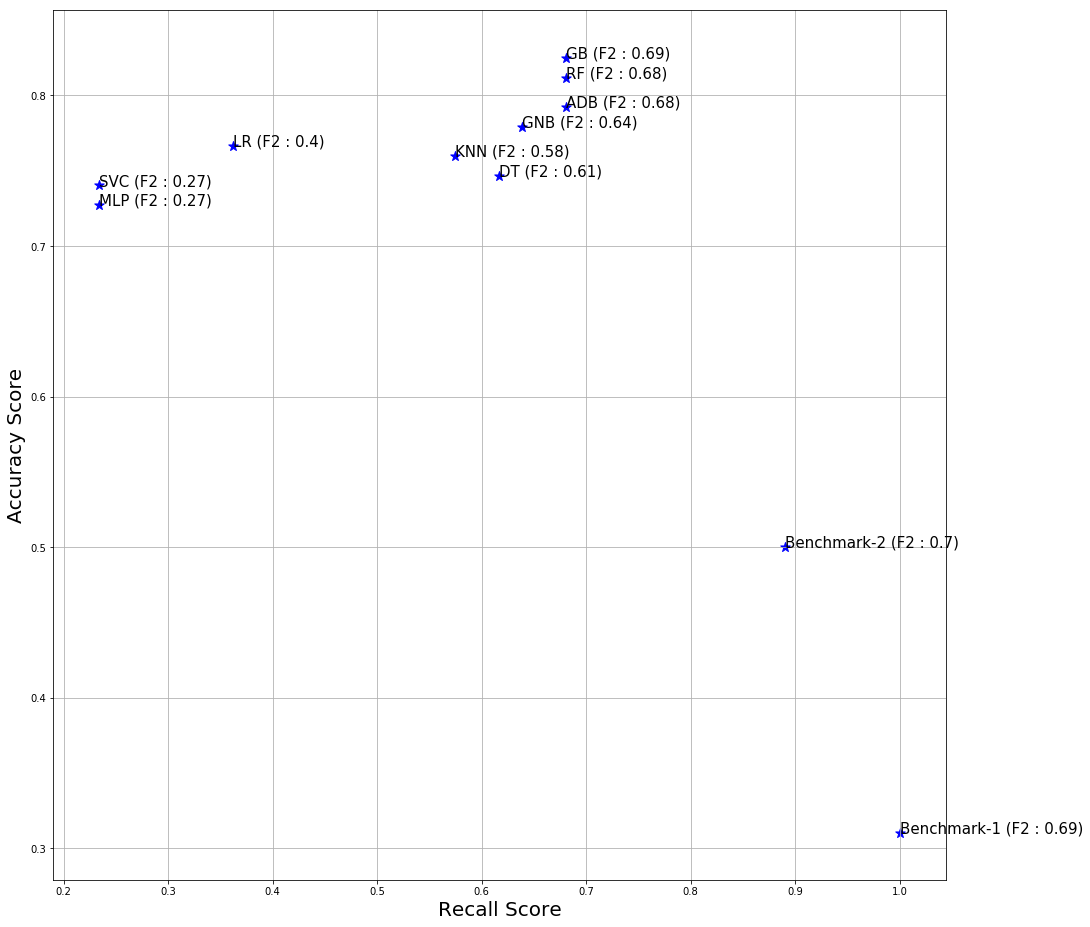

In [454]:
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=[58,651,393,203,123]

#fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

fig, ax = plt.subplots(figsize=(16,16))
area = (100 * f2_scores)
ax.scatter(recall_scores, accuracy_scores, s=100,marker='*',color='b',linewidths=1)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

ax.set_xlabel("Recall Score", fontsize=20)
ax.set_ylabel("Accuracy Score", fontsize=20)

for i, txt in enumerate(names):
    ax.annotate(txt + " (F2 : " + str(round(f2_scores[i],2)) + ")", (recall_scores[i],accuracy_scores[i]), fontsize=15)

ax.grid(True)

sample_size -  6
GaussianNB trained on 6 samples.
sample_size -  61
GaussianNB trained on 61 samples.
sample_size -  614
GaussianNB trained on 614 samples.
sample_size -  6
DecisionTreeClassifier trained on 6 samples.
sample_size -  61
DecisionTreeClassifier trained on 61 samples.
sample_size -  614
DecisionTreeClassifier trained on 614 samples.
sample_size -  6
KNeighborsClassifier trained on 6 samples.
sample_size -  61
KNeighborsClassifier trained on 61 samples.
sample_size -  614
KNeighborsClassifier trained on 614 samples.
sample_size -  6
SVC trained on 6 samples.
sample_size -  61
SVC trained on 61 samples.
sample_size -  614
SVC trained on 614 samples.
sample_size -  6
LogisticRegression trained on 6 samples.
sample_size -  61
LogisticRegression trained on 61 samples.
sample_size -  614
LogisticRegression trained on 614 samples.
sample_size -  6
RandomForestClassifier trained on 6 samples.
sample_size -  61
RandomForestClassifier trained on 61 samples.
sample_size -  614
Random

/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GradientBoostingClassifier trained on 61 samples.
sample_size -  614
GradientBoostingClassifier trained on 614 samples.
sample_size -  6
AdaBoostClassifier trained on 6 samples.
sample_size -  61
AdaBoostClassifier trained on 61 samples.
sample_size -  614
AdaBoostClassifier trained on 614 samples.
sample_size -  6
MLPClassifier trained on 6 samples.
sample_size -  61
MLPClassifier trained on 61 samples.
sample_size -  614


/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier trained on 614 samples.


IndexError: list index out of range

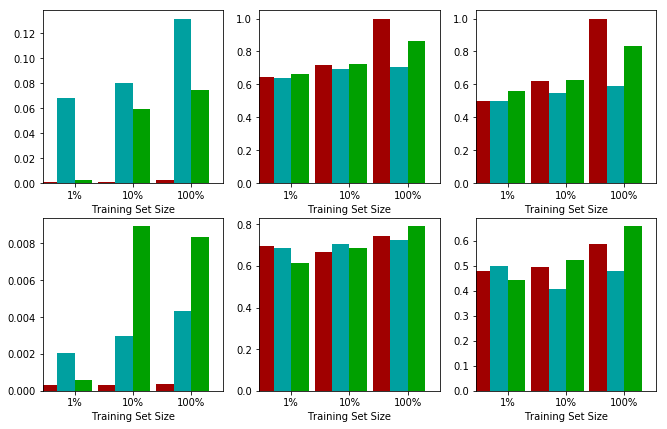

In [507]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = linear_model.LogisticRegression(random_state=11)
clf_B = tree.DecisionTreeClassifier(random_state=11)
clf_C = AdaBoostClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
# print int(X_train.shape[0]*(0.01)), int(X_train.shape[0]*(0.1)), X_train.shape[0]
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0]*(0.1))
samples_1 = int(X_train.shape[0]*(0.01))

# Collect results on the learners
results = {}
for name, model in classifiers
for _, clf in classifiers:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

The following three supervised learning models are appropriate for this problem. 

***1. Logistic Regression ***

- Real-world application
    * Predition of football match or election
    
- Model's strength

    * Simple algo and implementation
    * Training time is less 

- Model's weakness
    * High bias - Sometimes, it generalizes the data. 

- Model choice ( w.r.t Census dataset )
    * Here the output is categorical(earning more or less thank 50K). Since it is a classification problem, so 'Logistic Regression' is one of the obvious choice to start with.

***1. Decision Tree ***

- Real-world application
    * customer relationship management and fraud detection 
    * Ref - http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/ 
    
- Model's strength
    * Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
    * Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
    * Allow the addition of new possible scenarios.
    * Help determine worst, best and expected values for different scenarios.
    * Can be combined with other decision techniques.
    * Ref - https://en.wikipedia.org/wiki/Decision_tree#Advantages_and_disadvantages
    
- Model's weakness
    * Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.

- Model choice ( w.r.t Census dataset )
    * This dataset has multiple key attributes which can influence the prediction.

***1. Ensemble Methods ( AdaBoost ) ***

- Real-world application
    * Analyzing Sentiment( Output - Positive/Negative ). This model can be used along with Decision Tree to optimize the performance. 
    
- Model's strength
    * AdaBoost is best used to boost the performance of decision trees on binary classification problems.

- Model's weakness
    * It tries to correct the miss-classified points repeatedly, so it doesn't do good job when data quality is bad or data has too much outliers. 
    
- Model choice ( w.r.t Census dataset )
    * Census data set has a well structured data set. Before applying this alogorithm, we can easily normalize attributes which have high variance. 
    * This is a classification problem which can be solved using Decision Tree. AdaBoost will help to increase the model performance significantly. 
    
    * Ref - https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
    
#### Further Reading - 
* [advantages-of-different-classification-algorithms](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms)
* [model-selection-in-datascience](http://sebastianraschka.com/faq/docs/model-selection-in-datascience.html)
* [plot_classifier_comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
* [machine-learning-algorithm-choice](https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-choice)
* [data-science-machine-learning-cheat-sheets-updated](http://www.kdnuggets.com/2016/12/data-science-machine-learning-cheat-sheets-updated.html)
    

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print 'sample_size - ', sample_size
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [ ]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = linear_model.LogisticRegression(random_state=11)
clf_B = tree.DecisionTreeClassifier(random_state=11)
clf_C = AdaBoostClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
# print int(X_train.shape[0]*(0.01)), int(X_train.shape[0]*(0.1)), X_train.shape[0]
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0]*(0.1))
samples_1 = int(X_train.shape[0]*(0.01))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_B, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

For this dataset, it is really important to predict the number of persons who make more than 50K. If the model predicts that a given person can donate money(in other words make more than 50K per year) but actually isn't then that would cause a severe negative effect. While calculating the algorithm's performance(based on a standard scoring mechanism), we have given emphasis on the model's precision. 

We evaluated all possible algorithms to find the best model that would predict the outcome with a significantly high precision. 
After doing comparative analysis, we restricted our focus on the following 3 algorithms. 

1. Logistic Regression 
2. Decision Tree
3. Ensemble Method ( AdaBoost ) 

We found that AdaBoost algoritm has the best performance. This algorithm internally uses the Decision Tree algorithm and optimzed its performance.
Ref - Accuracy score and F-score on testing data are 0.8576 and 0.7246. 
Since 'census data' is not huge in size, so this model didn't take much time for training. But if we had a larger data set, then this model could have taken a significantly long time for training. 
If we had larger dataset and an immidiate need to use this in production environment, then we could have used the 'Logistic Regression' model which gives the 2nd best performance.

PFB section which shows the exact error% of the 3 models which we have used in the experimentation. 


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute confusion matrix for a model
print "Total Error (False Negative + False Positive) % \n-----------------------------------------------\n"
def create_confusion_matrix(model, model_name):
    cm = confusion_matrix(y_test.values, model.predict(X_test))
    tn, fp, fn, tp =  cm.ravel()
    print "Model - {:s}  ".format(model_name),  "- {:.2f}%".format((fp + fn)*100/float(y_test.count()))
    
create_confusion_matrix(clf_C, "AdaBoostClassifier")
create_confusion_matrix(clf_A, "LogisticRegression")
create_confusion_matrix(clf_B, "Decision Tree")

# Display confusion-matrix of the AdaBoost classifier
print "\nConfusion-matrix of the AdaBoost classifier\n-------------------------------------------\n"
model = clf_C
cm = confusion_matrix(y_test.values, model.predict(X_test))

tn, fp, fn, tp =  cm.ravel()
# print (tn, fp, fn, tp)
# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

print (tn, fp, fn, tp)


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

We chose the final model called AdaBoost classifier which is a type of Ensemble method. This approach tries to combine the predictions of several base learners(models) built with a given learning algorithm(we used 'Decision Tree') in order to create a generalized, robust and complex single estimator. Each one of this base learner(known as 'weak learner') makes predictions which are correct at least 50% of the time. A set of such weak(and simple) learners sequentially classify the whole dataset with a unique dimension(split point) and measure the complexity of each data points by assigning a weight. Every weak learner focuses to classify the data points which were marked as complex(according to weight value) by the previous classifier. This general and provably effective method of producing a very accurate prediction rule by combining weak/simple and moderately inaccurate rules is known as Boosting.

In this case, the AdaBoost based model fits the census data well and it operates with an optimized(~83%) accuracy.

Book Ref - [Boosting](https://mitpress.mit.edu/sites/default/files/titles/content/9780262017183_sch_0001.pdf) By Robert E. Schapire and Yoav Freund

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
#clf = tree.DecisionTreeClassifier(random_state=11)

#DTC = tree.DecisionTreeClassifier(random_state = 11, min_samples_split=5, max_depth=8)
#I will experiment with the DecisionTreeClassifier parameters in future. 
# Further reading required - To boost performance, it is essential to have good feature engineering and data conditioning
clf = AdaBoostClassifier(random_state=11)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
    
#parameters = {'min_samples_split' : [2], 'max_depth': [11], 'min_samples_split': [4]}  

#n_estimators : integer, optional (default=50)
#The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
parameters = {'n_estimators':[100, 200, 300]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))

from sklearn.metrics import recall_score
print recall_score(y_test, best_predictions)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8576         |    0.8663       |
| F-score        |    0.7246         |    0.7425       |


**Answer: **

    The 'accuracy score' and 'F-score' on the testing data are 0.8663 and 0.7425. 
    The equivalent scores for Naive Predictor was 0.2478 and 0.2917
    
    The result of the optimized model is much better than the navie predictor. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Before doing the analysis, I did some high level analysis of the cencus data using excel.

Based on some asumptions, I think the following 5 features are really important. 

1. Capital gain 
2. Captial loss 
    - Above two attributes are key features to determine if a person makes more than $50K. I think these two attributes should be considered together( like difference of gain and loss) to get a better picture. 

3. Education -
    - In general, persons with higher educational degree (undergrad college degree and above) should have better chance of making $50K per year.

2. Hours-per-Week - 
    - For hourly paying jobs, more income is kind of propotional to more number of working hours.

5. WorkClass - 
    - All persons who are doing some job(specially in Govt. sectors) should have better financial stability or earning potential than the other groups. 
 [ Available Workclasses - State-gov,Self-emp-not-inc,Private,Federal-gov,Local-gov,Self-emp-inc,Without-pay ]
 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=11)
model.fit(X_train, y_train)

#print X_train.shape
#print len(model.feature_importances_)
#print np.sum(model.feature_importances_)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

#### Results:

|    Feature Imp - My Observation    | Feature Imp - Actual based on data  |
| :--------------------------------: | :---------------------------------: | 
| Capital Gain.                      | Capital Loss                        |
| Capital Loss                       | Age                                 |
| Education.                         | Capital Gain                        |
| Hours-per-week                     | hours-per-week                      |
| Work Class.                        | Education-num                       |

I guessed 4 out of 5 important features based on my high-level analysis using excel. 
I was not sure about the 'Age' attribute and its significance on the earning capacity. I also thought that 'Work Class' is an important feature for this use-case. I think that the data and the related important features-set may vary based on country/state/econoimic condition.

According to the visualization generated by 'model.feature_importances_', 'capital-loss' followed by 'age' are the top two important features in predicting a subject's earning potential above $50K.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Inspite of reducing the features set, the model is maintaing a significanlty high accuracty(~97% to the original ) and f-score(94%). If training time was a factoer, I would have definately considered this model with the reduced features set(including only the important ones). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.